In [1]:
import os
import sys

sys.path.append(os.path.abspath('../src'))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
import numpy as np
from copolymer_simulator import Simulator
from bax import BAX

In [4]:
N = 21
init_D_size = 10
task_kwargs = {"tau": 0.05}

In [5]:
simulator = Simulator(polymer='diblock')

In [6]:
X1_range = np.linspace(15, 53, 20)
X2_range = np.linspace(0, 100, 51)

X1, X2 = np.meshgrid(X1_range, X2_range)
X1_flat = X1.flatten()
X2_flat = X2.flatten()
grid_points = np.column_stack((X1_flat, X2_flat))  # Shape (1020, 2)
X = torch.from_numpy(grid_points)

In [7]:
init_X, init_Y, init_noise = simulator.get_init_data(init_D_size, random_state=42)

In [8]:
psbax = BAX(init_X, init_Y, init_noise, true_mask=None)

Iteration 0/20


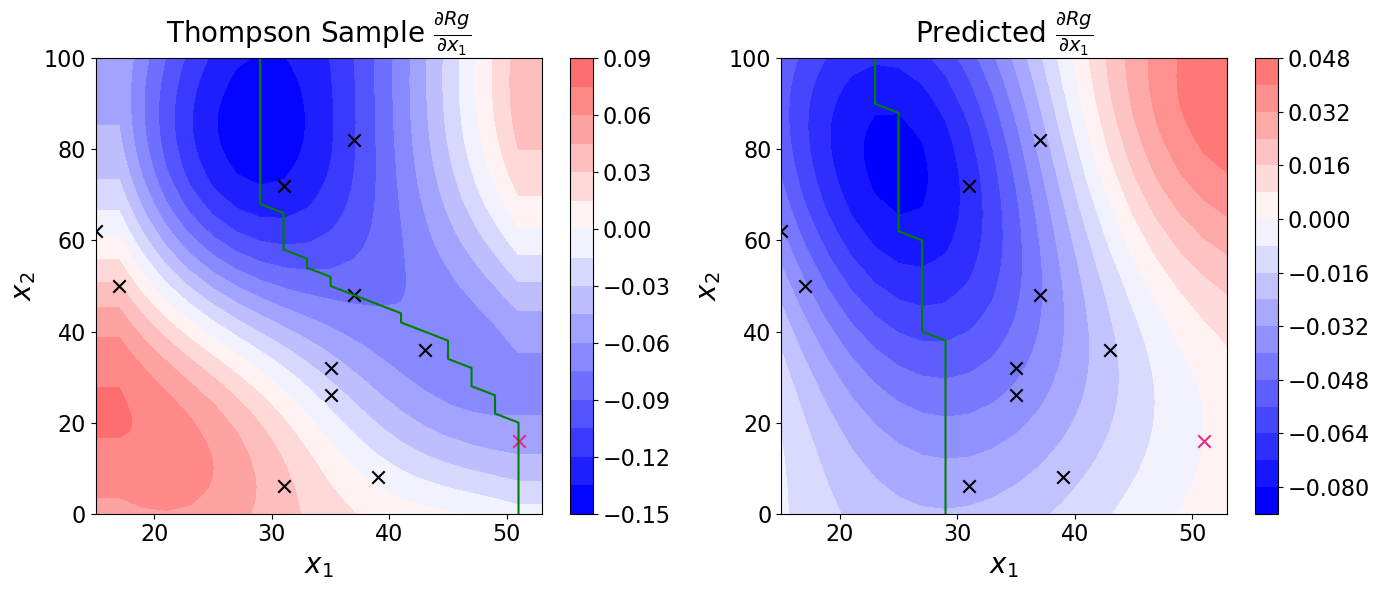

Iteration 1/20


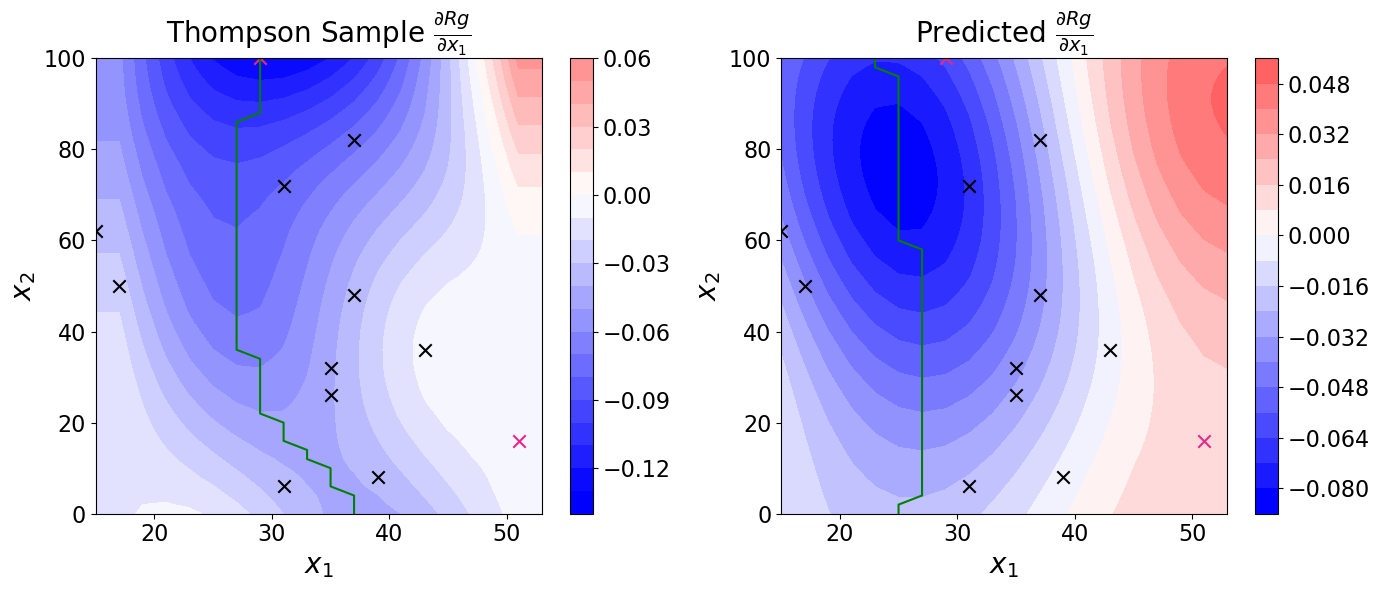

Iteration 2/20


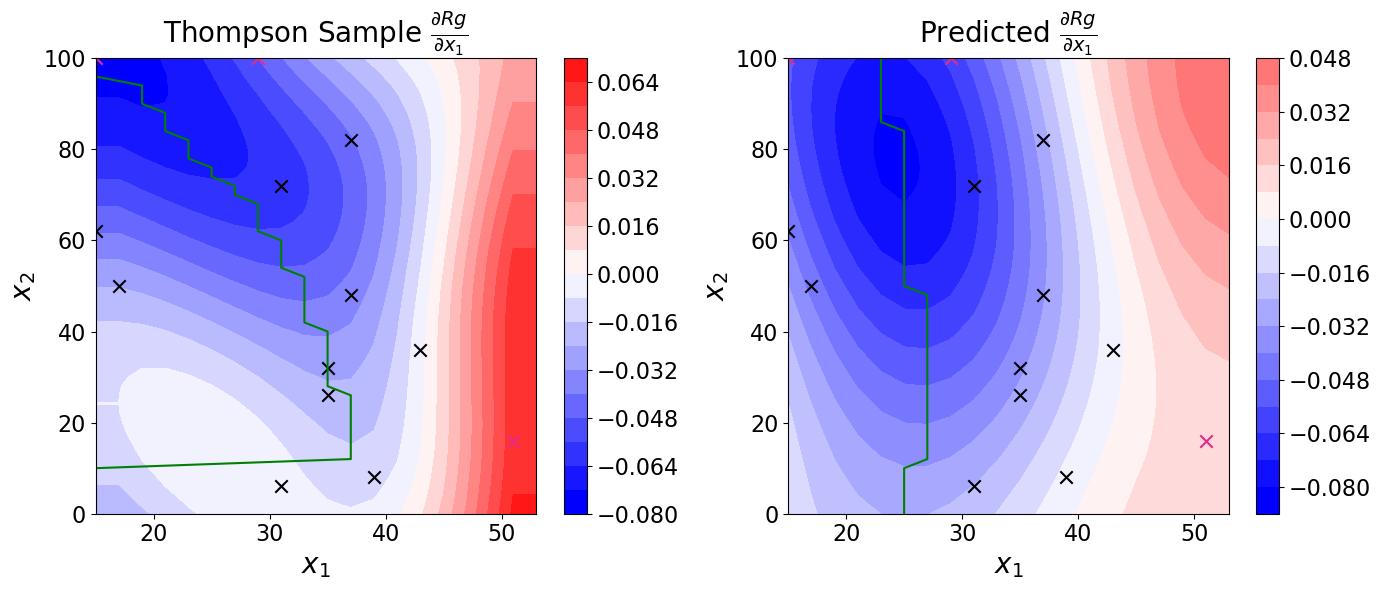

Iteration 3/20


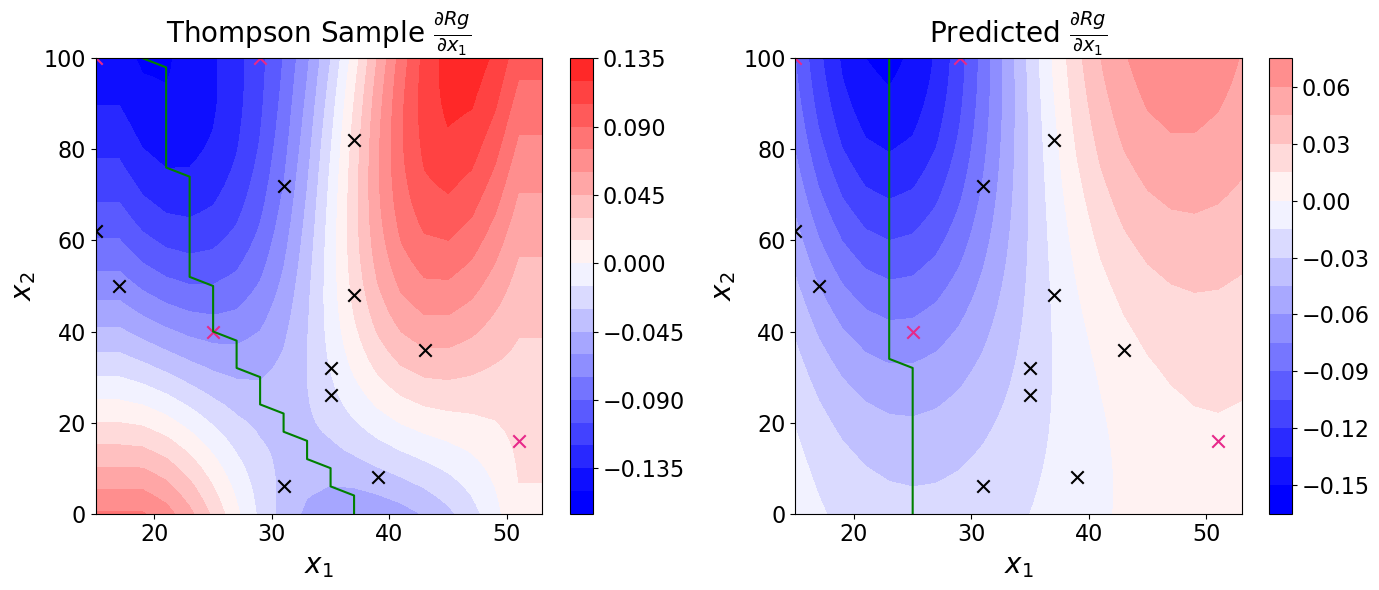

Iteration 4/20


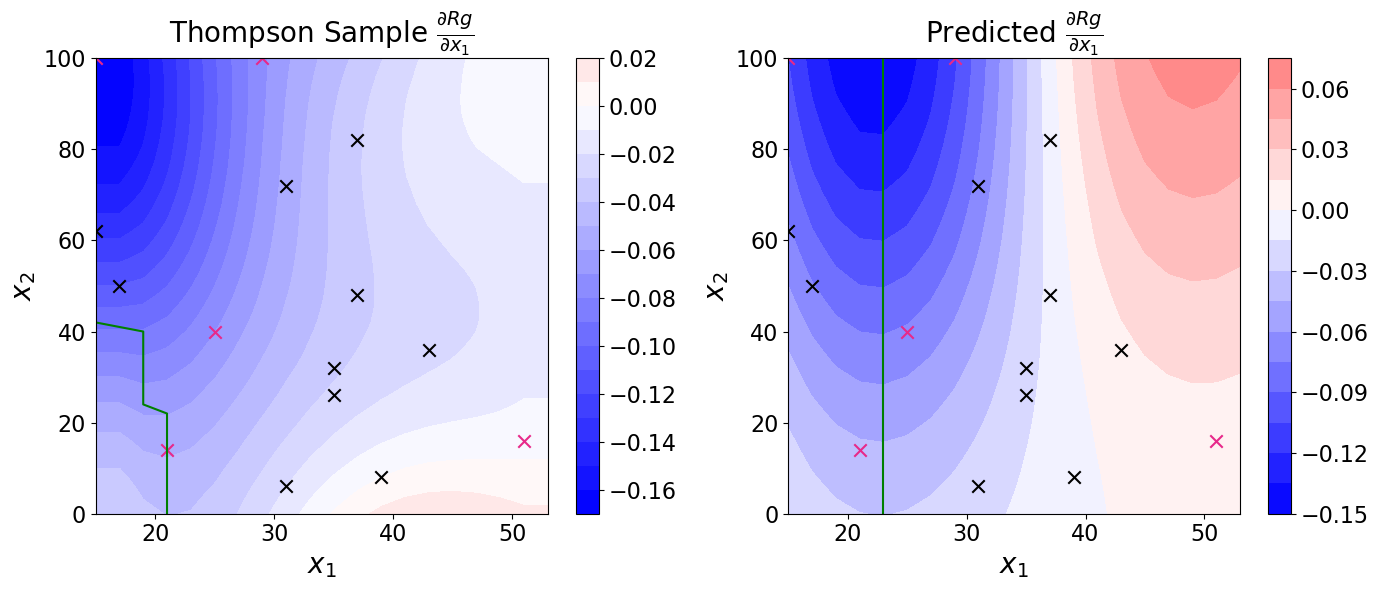

Iteration 5/20


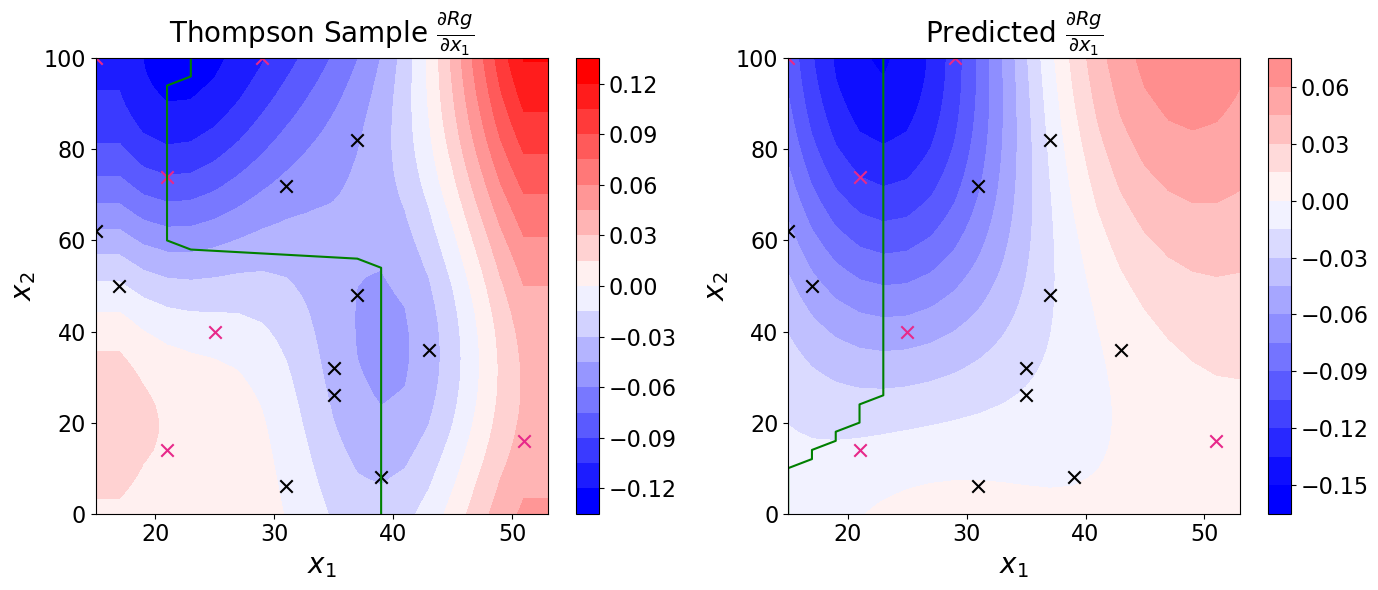

Iteration 6/20


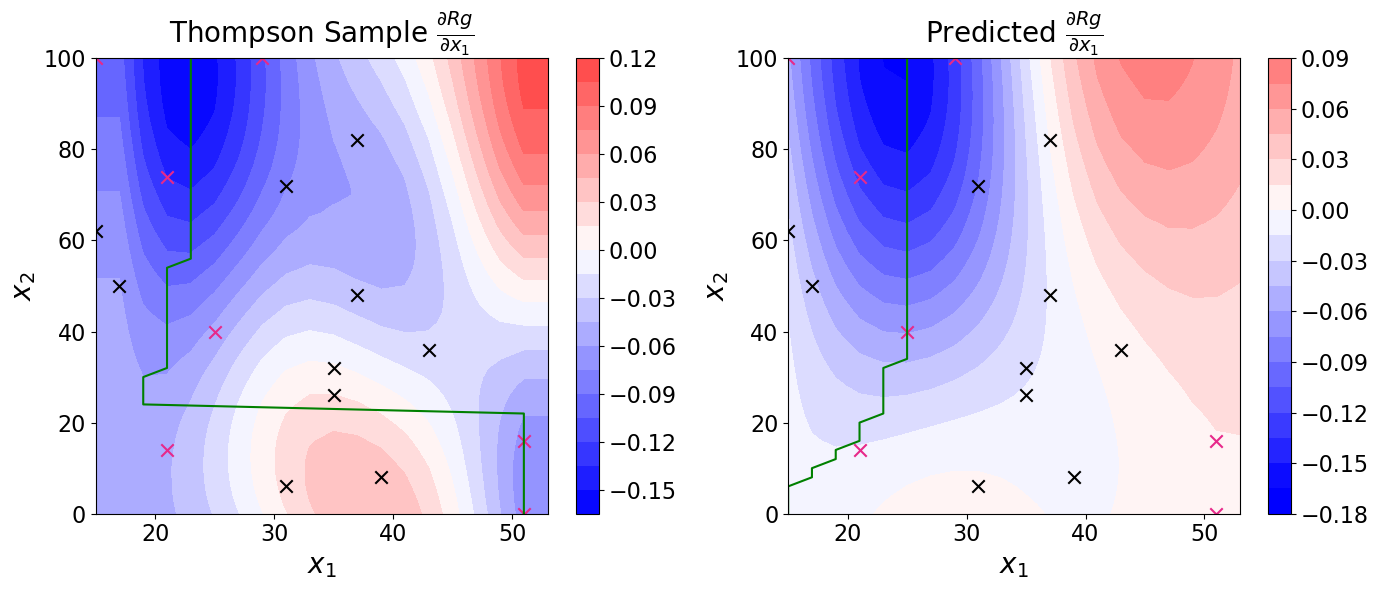

Iteration 7/20


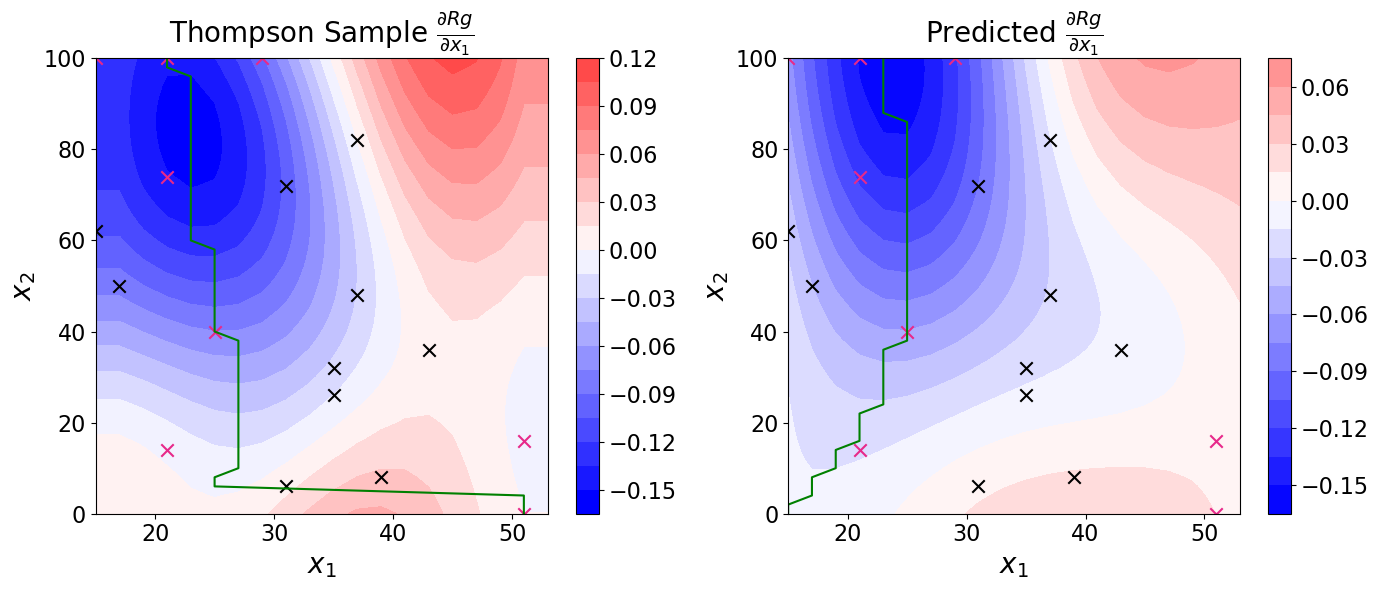

Iteration 8/20


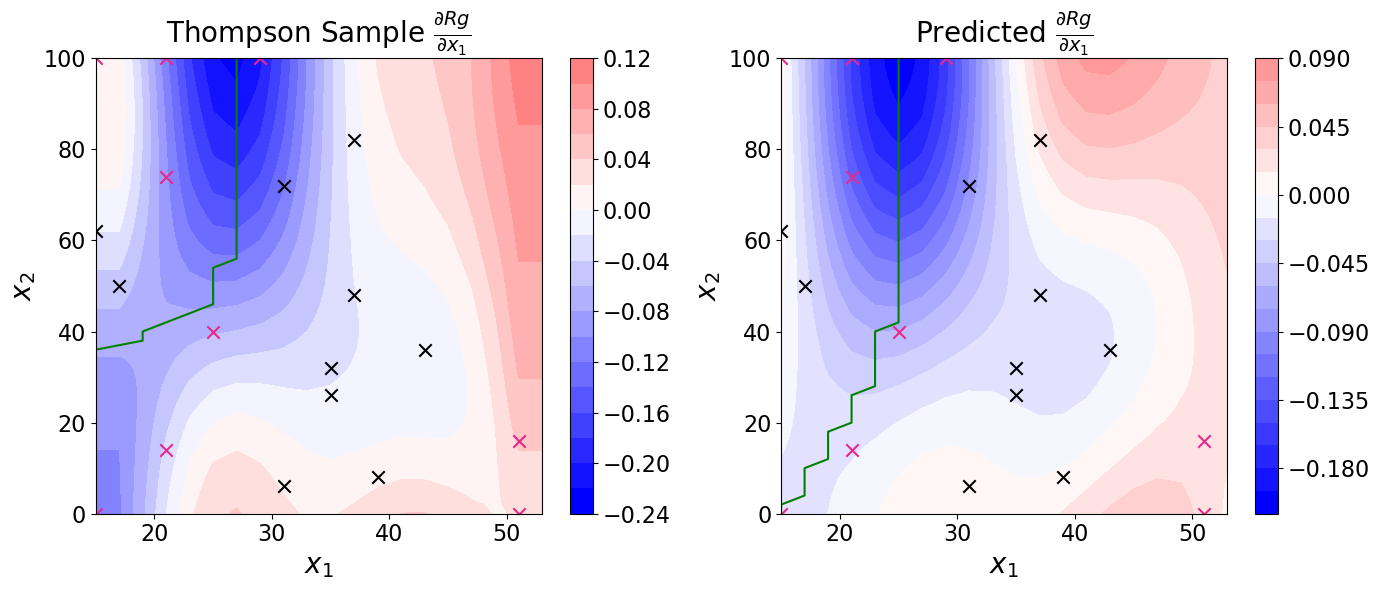

Iteration 9/20


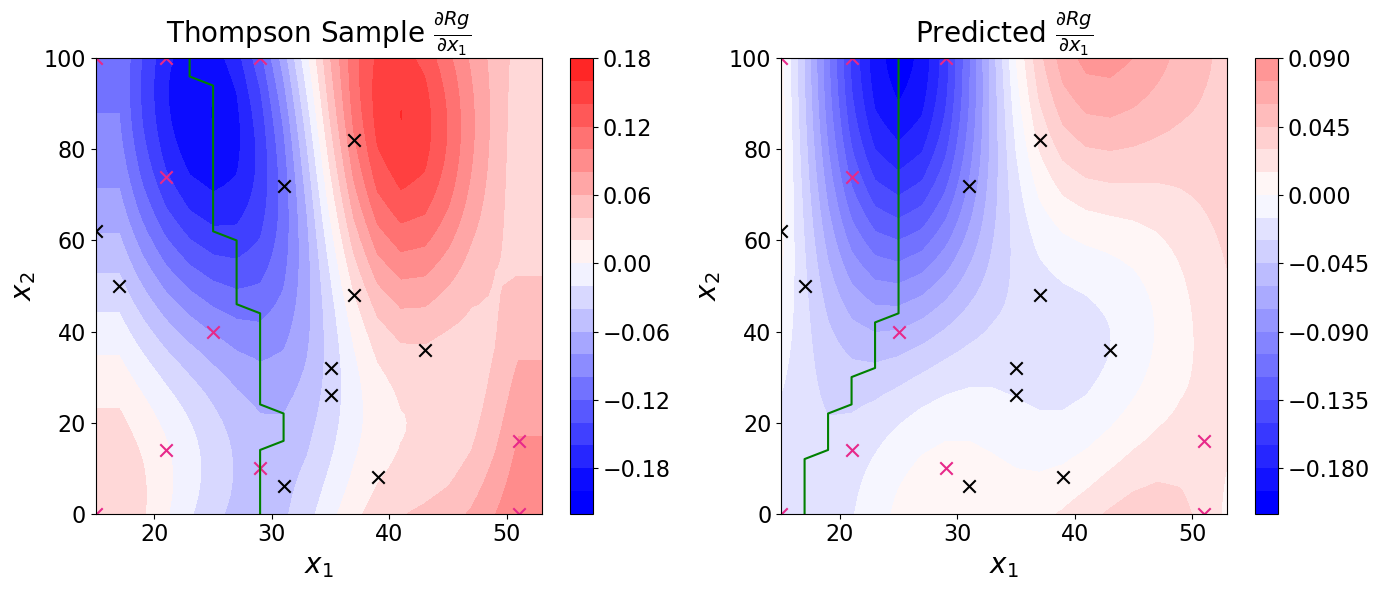

Iteration 10/20


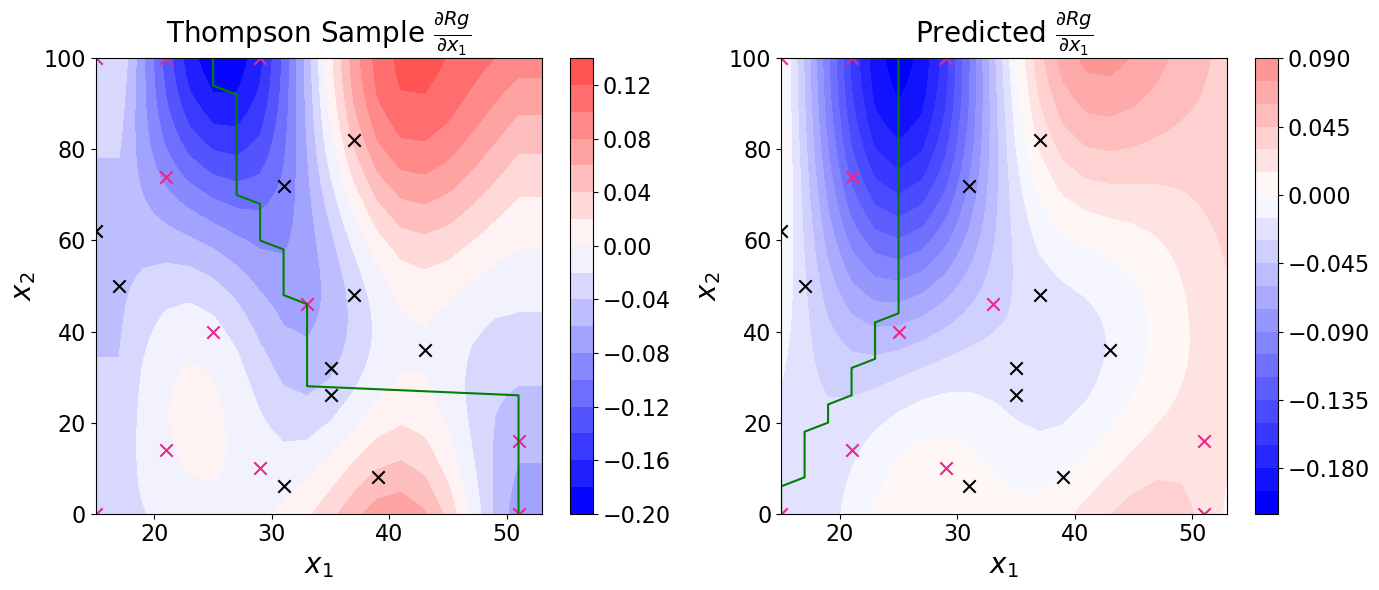

Iteration 11/20


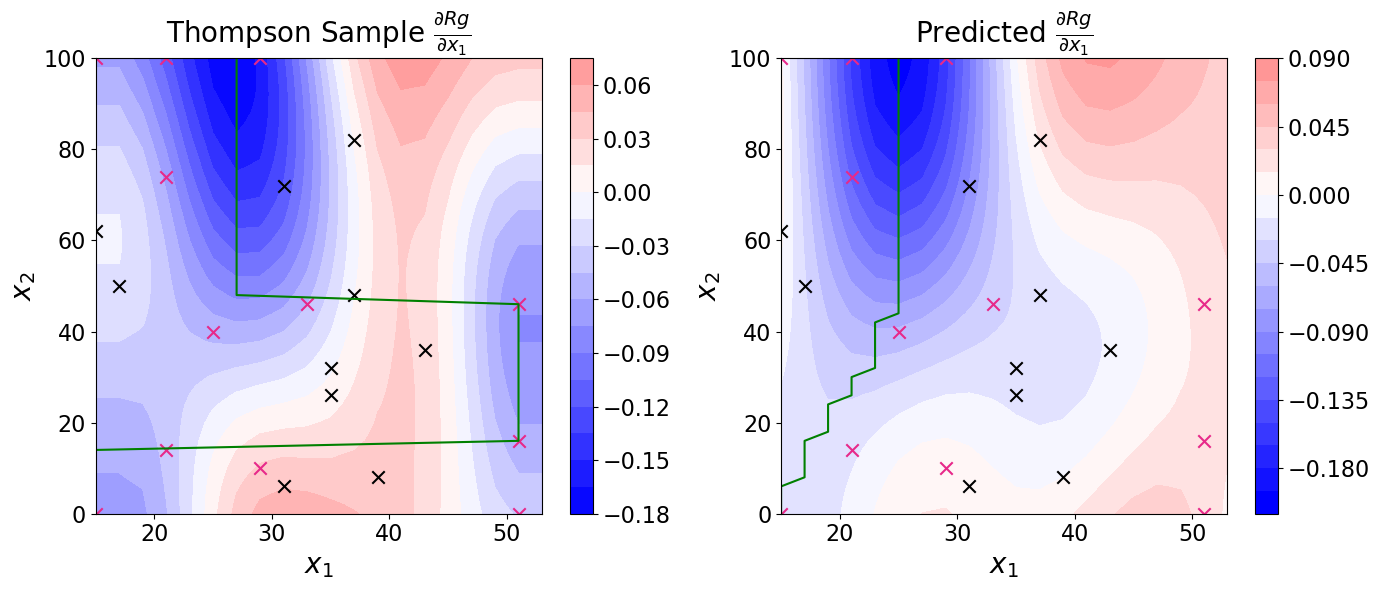

Iteration 12/20


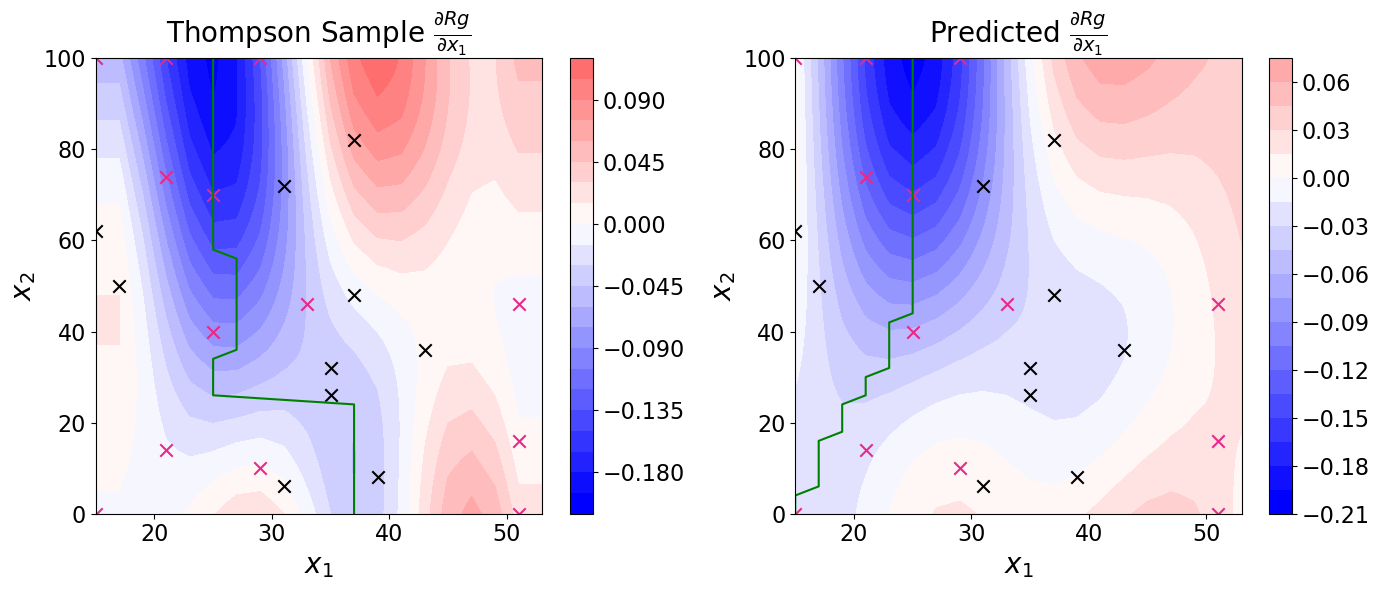

Iteration 13/20


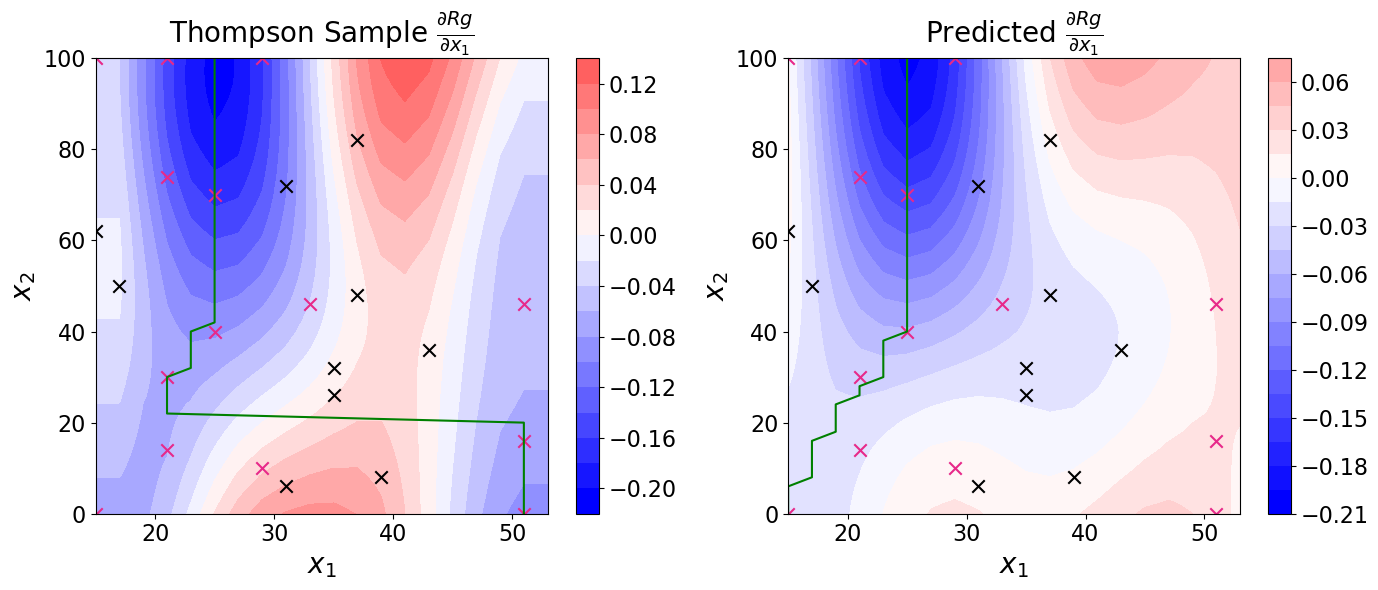

Iteration 14/20


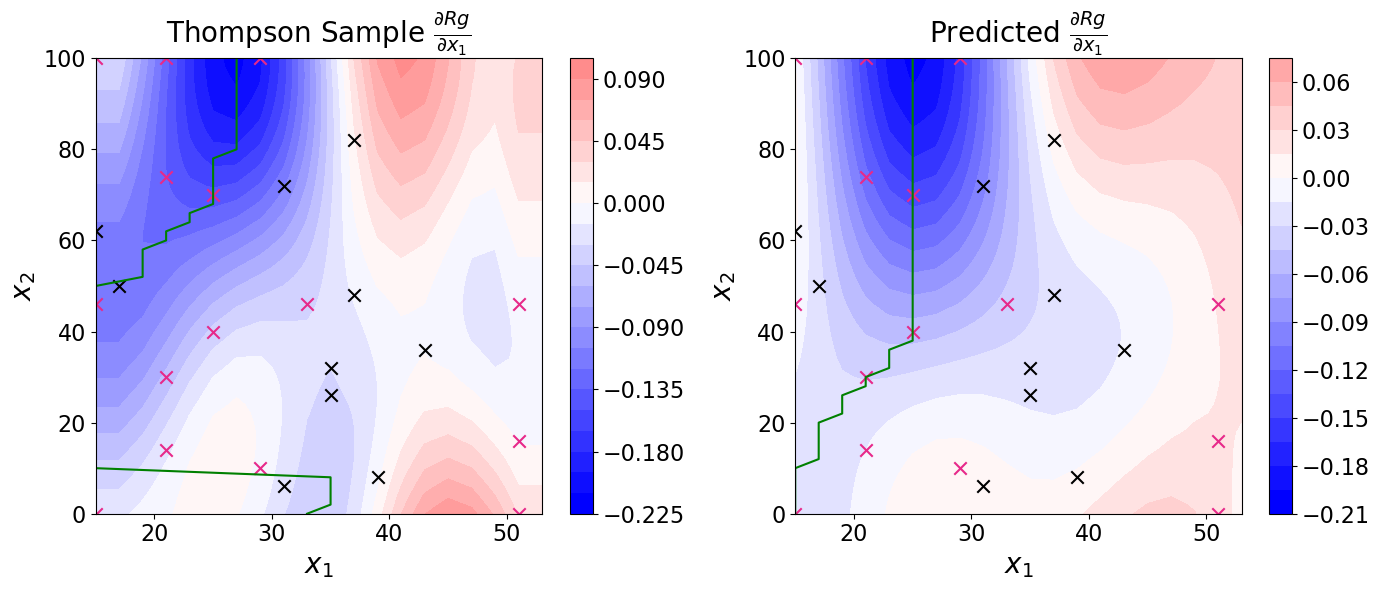

Iteration 15/20


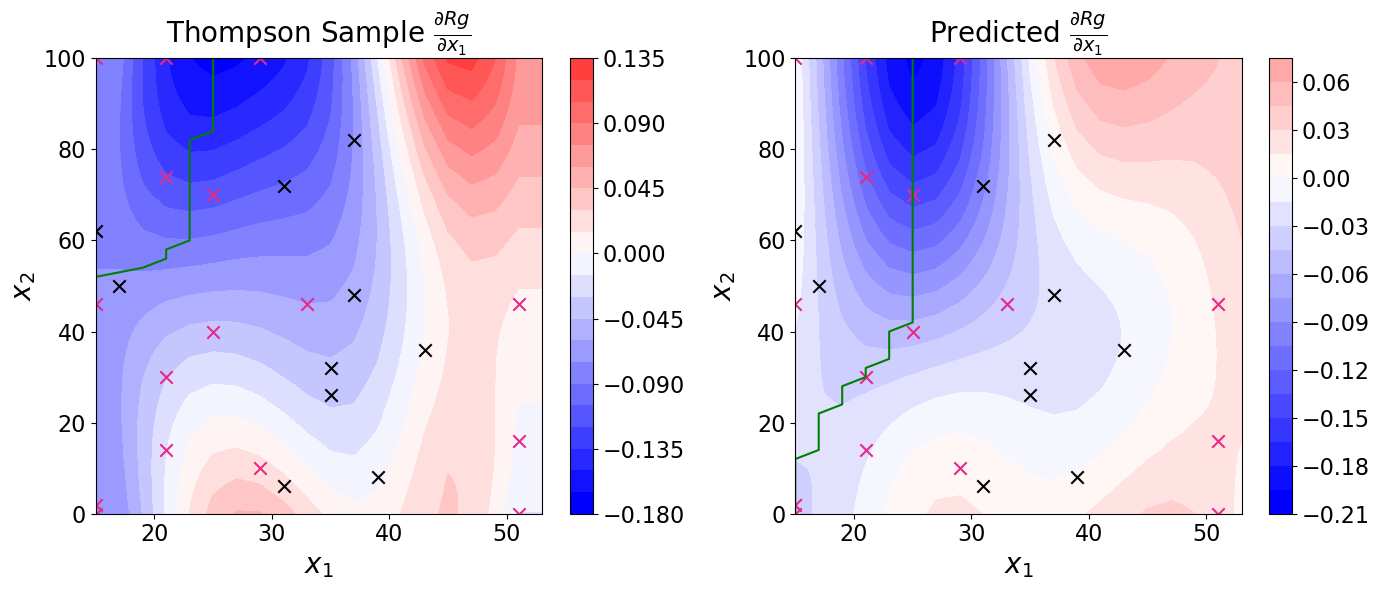

Iteration 16/20


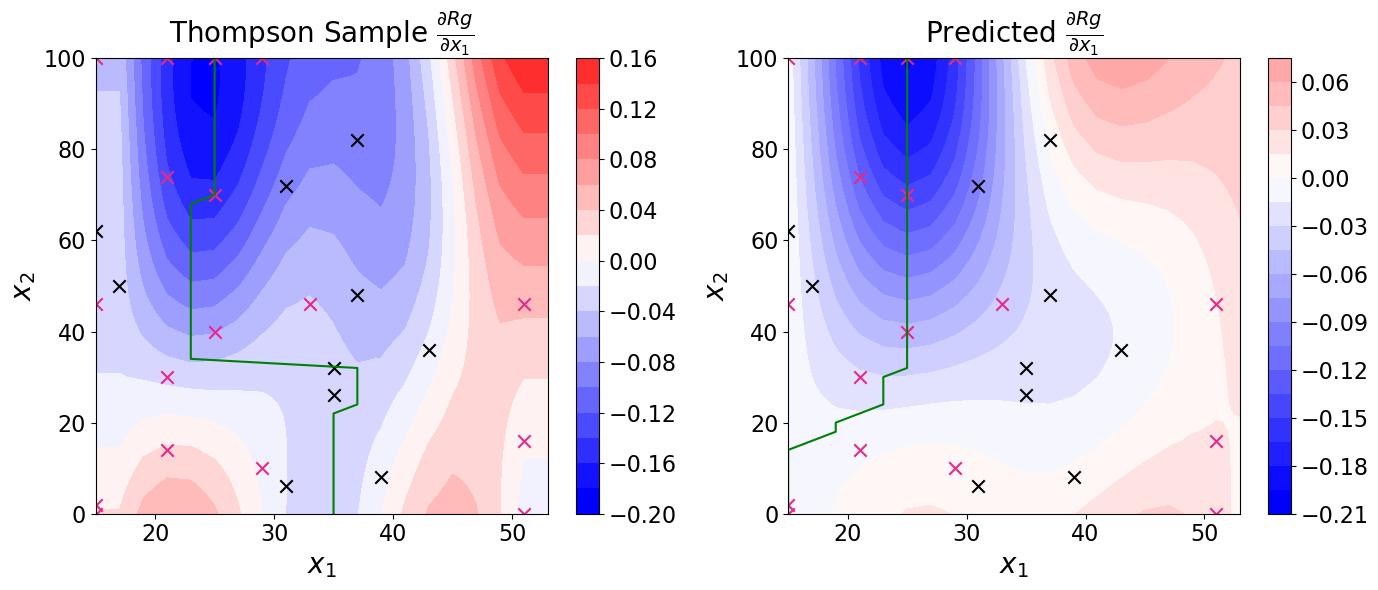

Iteration 17/20


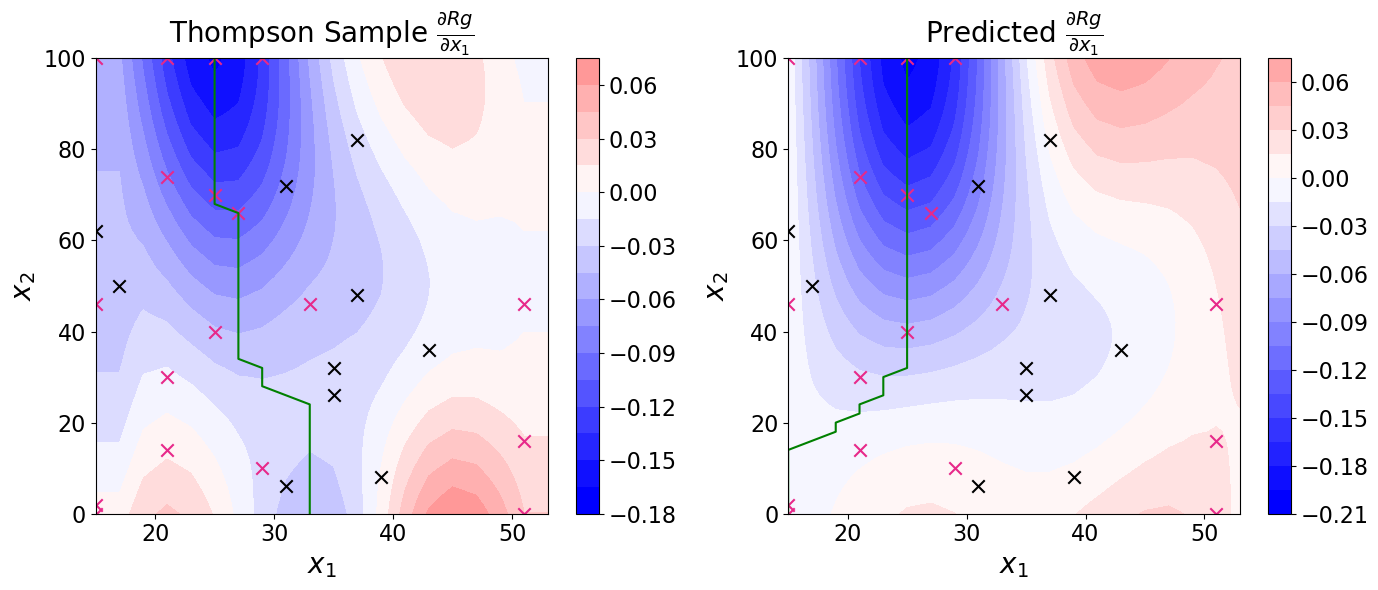

Iteration 18/20


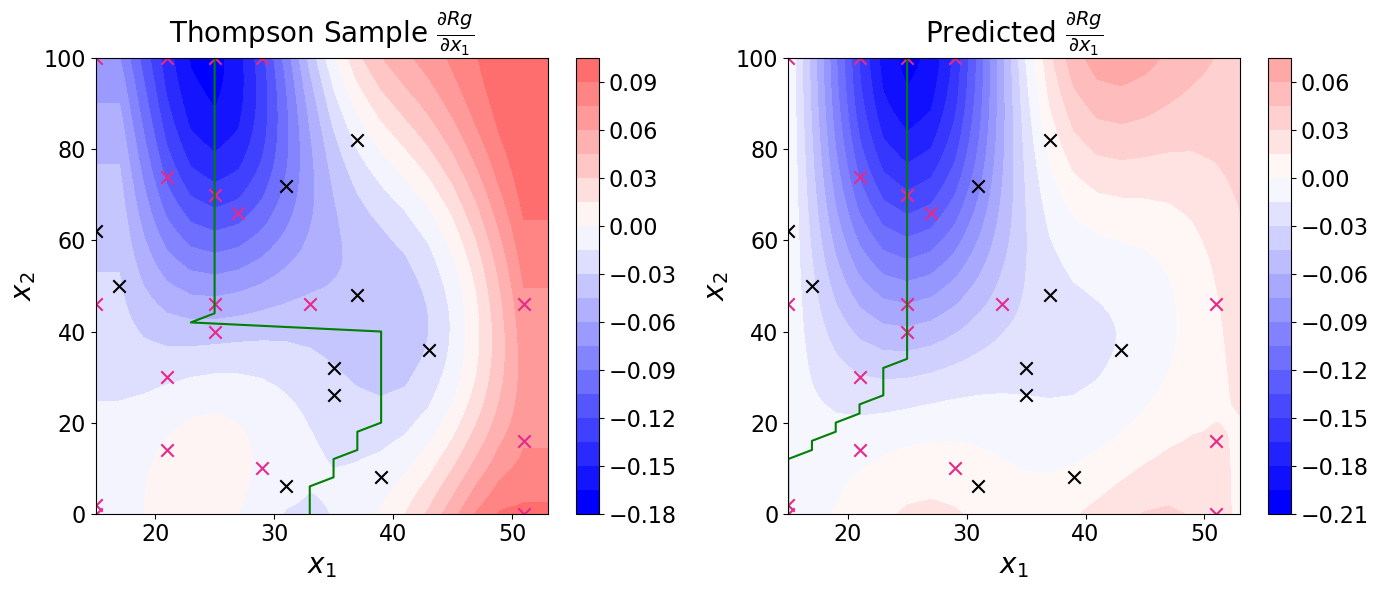

Iteration 19/20


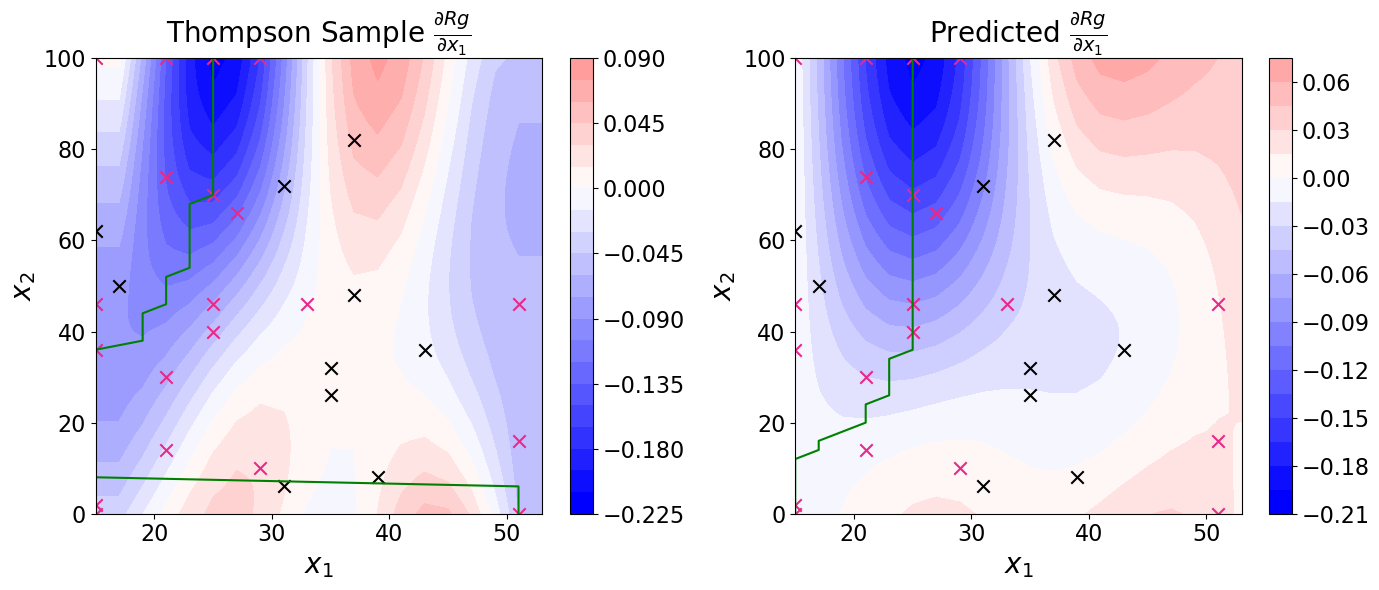

Iteration 20/20


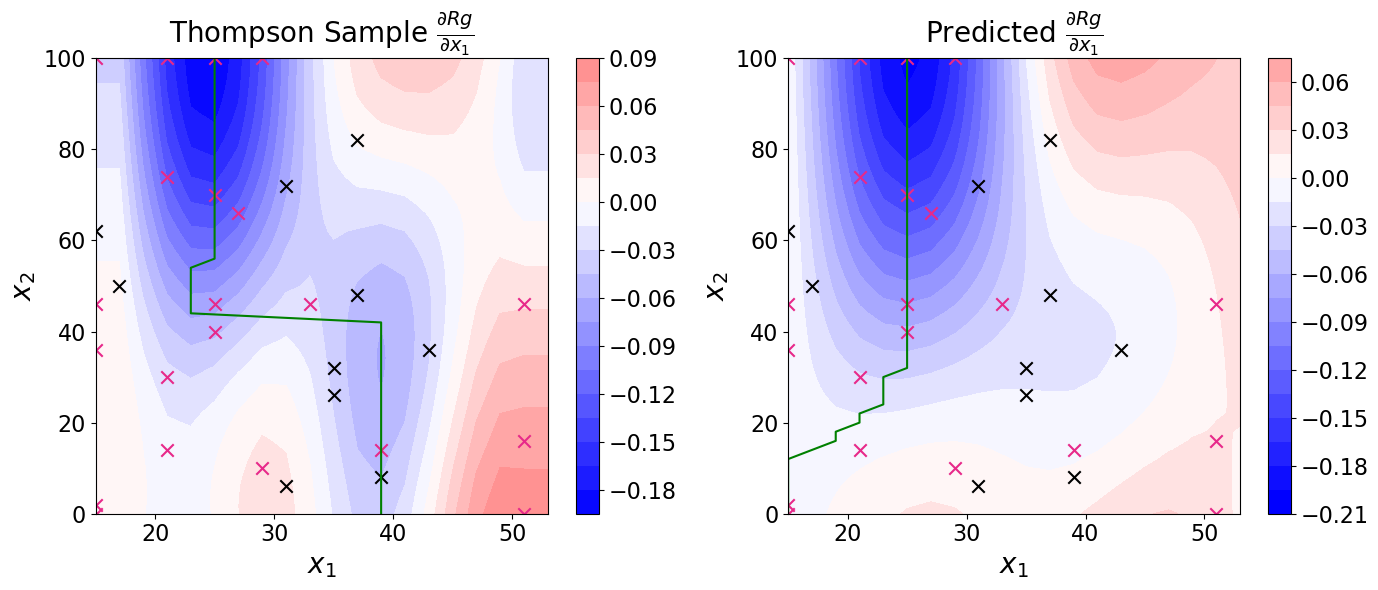

In [9]:
x1_star, samples = psbax.run(N, X1_range, X2_range, simulator, task="manifold crawling", task_kwargs=task_kwargs)